In [1]:
import pandas as pd
import numpy as np
from collections import Counter

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib
import altair as alt

matplotlib.rcParams['figure.figsize']=(16,9)  
stopwords = set(STOPWORDS)

In [2]:
df = pd.read_pickle('Lebron_topicdf.pkl')
df.head(3)

,Created_Date,Tweet Id,Text,Rendered Tweet,User_Name,Followers,Friends,Favourites,Media,Location,...,Place,Hashtags,Source,Mentions,clean_text,sentiment_score,Topic,tags,senti_label,words
0,2021-10-19 23:59:55+00:00,1450612709205159939,@Lakers @KingJames Coming into the arena looki...,@Lakers @KingJames Coming into the arena looki...,SteveNe13350562,1,35,109,0,NaN,...,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","[User(username='Lakers', id=20346956, displayn...",Coming into the arena looking like a boss,0.0,3,[],neutral,"[Coming, arena, looking, like, boss]"
1,2021-10-19 23:59:44+00:00,1450612663503917056,@Awesemo_Com @AwesemoNBA @NBA @NBAonTNT @Steph...,@Awesemo_Com @AwesemoNBA @NBA @NBAonTNT @Steph...,markFin73763459,27,156,516,18,NaN,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","[User(username='Awesemo_Com', id=9561989702037...",Curry,0.0,2,[],neutral,[Curry]
2,2021-10-19 23:59:42+00:00,1450612655090278402,@RealSkipBayless where you at #COAWRD? @KDTrey...,@RealSkipBayless where you at #COAWRD? @KDTrey...,ByrdyStrokes,2,17,269,32,NaN,...,NaN,"['COAWRD', 'WEAK']","<a href=""http://twitter.com/download/iphone"" r...","[User(username='RealSkipBayless', id=43139414,...",where you at ? playing. Ready to ride back ...,0.1,4,"[COAWRD, WEAK]",neutral,"[playing, Ready, ride, back, play, pick, amp, ..."


In [3]:
data = df[df['senti_label'].isin(['NEGATIVE','negative'])]

wcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=40, 
                      random_state=694).generate(str(data.clean_text))

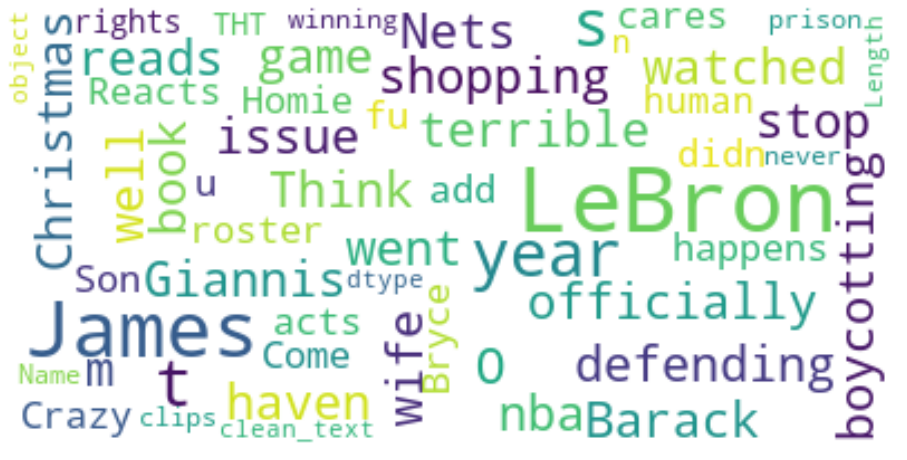

In [4]:
plt.axis("off")
plt.imshow(wcloud, interpolation="bilinear")
plt.show()

# LeBron negative tweets wordcloud

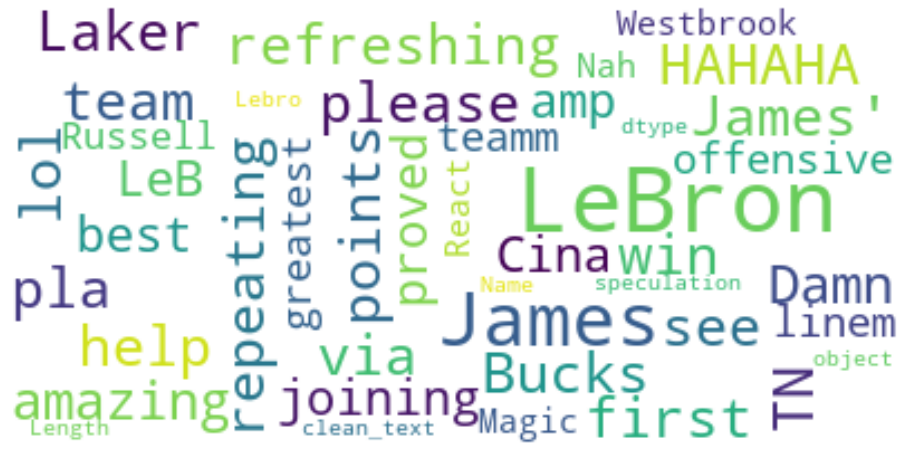

In [5]:
data1 = df[df['senti_label'].isin(['POSITIVE','positive'])]

wcloud1 = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=40, 
                      random_state=694).generate(str(data1.clean_text))

plt.axis("off")
plt.imshow(wcloud1, interpolation="bilinear")
plt.show()

# LeBron positive tweets wordcloud

In [6]:
c = Counter()
c1 = Counter()

for i in data['tags']:
    c.update(Counter(i))
    
for i in data['words']:
    c1.update(Counter(i))
    
top = c.most_common(25)
tag_df = pd.DataFrame(top,columns = ['Tag','count'])
top1 = c1.most_common(25)
word_df = pd.DataFrame(top1,columns = ['Word','count'])

tag_df.head()

,Tag,count
0,LeBronJames,2236
1,NBAAllStar,1106
2,LakeShow,750
3,NBA,644
4,Lakers,476


In [7]:
alt.Chart(tag_df[1:]).mark_bar().encode(
    x = alt.X('Tag',sort=['count'],title='Tags',axis=alt.Axis(labelAngle=-45)),
    y = alt.Y('count:Q',title = 'Overall Count')
).properties(width=900,height=400,title={
      "text": ["Most popular tags - LeBron negative tweets"],
      "subtitle":["The top 25 most popular tags used among the negative tweets about LeBron"]  
    }).configure_axis(
    labelFontSize=16,
    titleFontSize=20
).configure_title(
    anchor='start',
    fontSize = 24,
    subtitleFontSize = 15
)

alt.Chart(...)

In [8]:
alt.Chart(word_df[1:]).mark_bar().encode(
    x = alt.X('Word',sort=['count'],title='Words',axis=alt.Axis(labelAngle=-45)),
    y = alt.Y('count:Q',title = 'Overall Count')
).properties(width=900,height=400,title={
      "text": ["Most popular words - LeBron negative tweets"],
      "subtitle":["The top 25 most popular words used among the negative tweets about LeBron"]  
    }).configure_axis(
    labelFontSize=16,
    titleFontSize=20
).configure_title(
    anchor='start',
    fontSize = 24,
    subtitleFontSize = 15
)

alt.Chart(...)